# CSC 792 Assignment 2

### Mangesh Sakordekar (7440013)

#### Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#### Helper Functions

In [11]:
def plot3dgraph(plot_surface, surface, plot_data, data):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    if plot_data == True:
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap='RdYlBu', s=100)
        ax.set_title('Feature Space')
    if plot_surface == True:
        ax.plot_surface(surface[0], surface[1], surface[2], cmap='viridis')
        ax.set_title('Error Function Surface')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('y')
    
    if plot_surface == True and plot_data == False:
        ax.set_xlabel('weight 0')
        ax.set_ylabel('weight 1')
    
    plt.show()

In [13]:
def plot2dgraph(plot_surface, surface, plot_path, path):
    if plot_surface == True:
        plt.contourf(surface[0], surface[1], surface[2], levels=28)
    if plot_path == True:
        plt.plot(path[0], path[1], 'bo', linestyle="--")
    plt.xlabel('Weight 0')
    plt.ylabel('Weight 1')
    plt.title('Error Function Surface')
    plt.colorbar()
    plt.show()

#### Reading fruit_data.txt

In [9]:
file = open('fruit_data.txt', 'r')

In [11]:
content = file.read()

In [13]:
lines = content.splitlines()
matrix = [line.split() for line in lines]
data = np.array(matrix).astype(float)

#### Scatter plots of the Vitamin Space

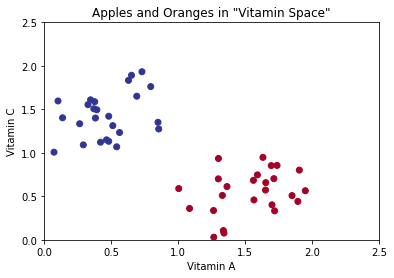

In [16]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='RdYlBu')
plt.xlabel('Vitamin A')
plt.ylabel('Vitamin C')
plt.title('Apples and Oranges in "Vitamin Space"')
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.show()

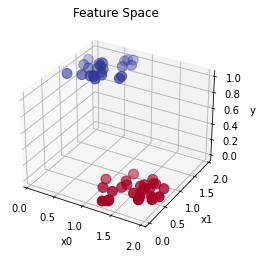

In [18]:
plot3dgraph(False, None, True, data)

#### Calculate and Plot the Error Surface

In [21]:
xx, yy = np.meshgrid(np.linspace(-20, 20, 500), np.linspace(-20, 20, 500), indexing="xy")
xy = np.dstack((xx, yy))

In [23]:
points = data[:, 0:2]
labels = data[:, 2]
zz = np.ndarray((500 , 500))
for i in range(0, 500):
    for j in range(0, 500):
        curr_sum = 0
        preds = 1/(1 + np.exp(-np.dot(points, xy[i][j])))
        mse = np.sum((preds - labels)**2) / preds.shape[0]
        zz[i][j] = mse

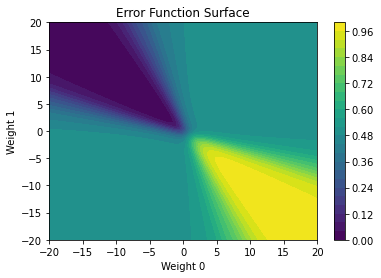

In [25]:
plot2dgraph(True, [xx,yy,zz], False,  None)

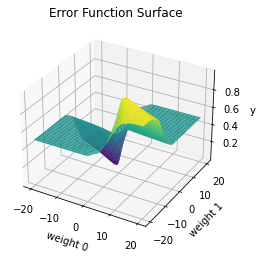

In [27]:
plot3dgraph(True, [xx,yy,zz], False,  None)

#### Error Surface for Weights [5,-5]

In [30]:
x, y = np.meshgrid(np.linspace(0, 2, 50), np.linspace(0, 2, 50), indexing="xy")
xy1 = np.dstack((xx, yy))

z = np.ndarray((50 , 50))
for i in range(0, 50):
    for j in range(0, 50):
        z[i][j] = 1/(1 + np.exp(-np.dot(xy1[i][j], [5,-5])))


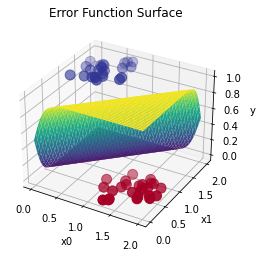

In [32]:
plot3dgraph(True, [x,y,z], True,  data)

#### Gradient Descent and Path Plot

In [35]:
w0 = 5
w1 = -5

xpath = [w0]
ypath = [w1]

mse = 1

learning_rate = 2.5

while mse > 0.00001:
    preds = 1/(1 + np.exp(-np.dot(points, [w0, w1])))
    
    mse = np.sum((preds - labels)**2) / preds.shape[0]
    if mse < 0.00001:
        break
        
    dw0 = 2 * np.sum( (preds - labels) * preds * (1-preds) * points[:, 0]) / 50.0
    dw1 = 2 * np.sum( (preds - labels) * preds * (1-preds) * points[:, 1]) / 50.0

    w0 -= learning_rate * dw0 
    w1 -= learning_rate * dw1 
    
    xpath.append(w0)
    ypath.append(w1)

print(w0, w1)

-1.1022803748031288e+01 10.739700326782241


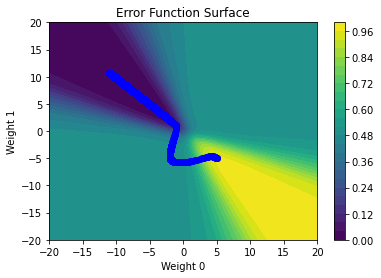

In [37]:
plot2dgraph(True, [xx,yy,zz], True, [xpath, ypath])

#### Model Surface for the Final Weight Solution

In [40]:
x, y = np.meshgrid(np.linspace(0, 2, 50), np.linspace(0, 2, 50), indexing="xy")
xy1 = np.dstack((xx, yy))

z = np.ndarray((50 , 50))
for i in range(0, 50):
    for j in range(0, 50):
        z[i][j] = 1/(1 + np.exp(-np.dot(xy1[i][j], [w0,w1])))

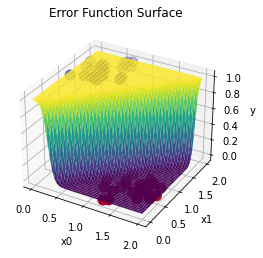

In [42]:
plot3dgraph(True, [x,y,z], True,  data)